In [25]:
import pandas as pd
from google.colab import files

# Step 1: Upload the dataset(s)
uploaded = files.upload()



# Step 2: Load the datasets
data = pd.read_csv(next(iter(uploaded)))


# Step 3: Inspect the first few rows of each dataset
print(" Dataset:")
print(data1.head())



Saving retail_sales_dataset.csv to retail_sales_dataset.csv
 Dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     

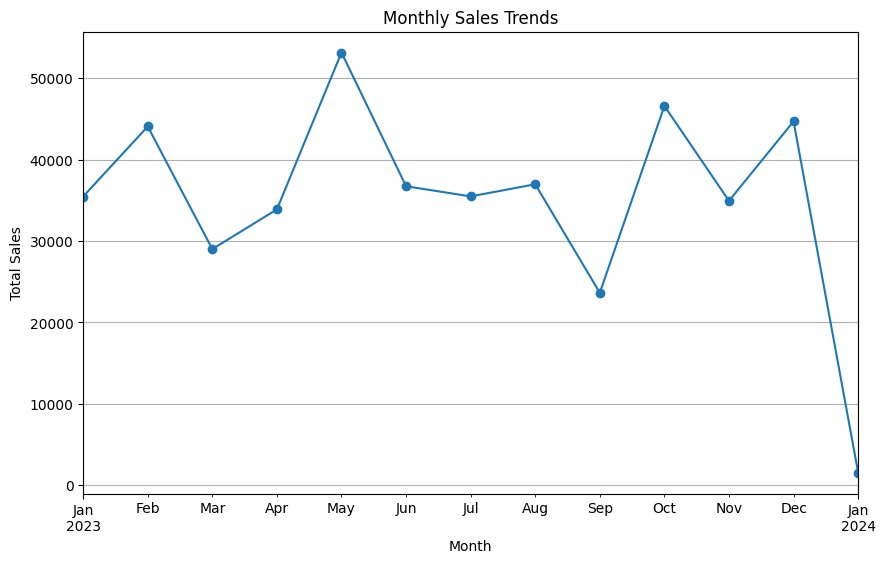

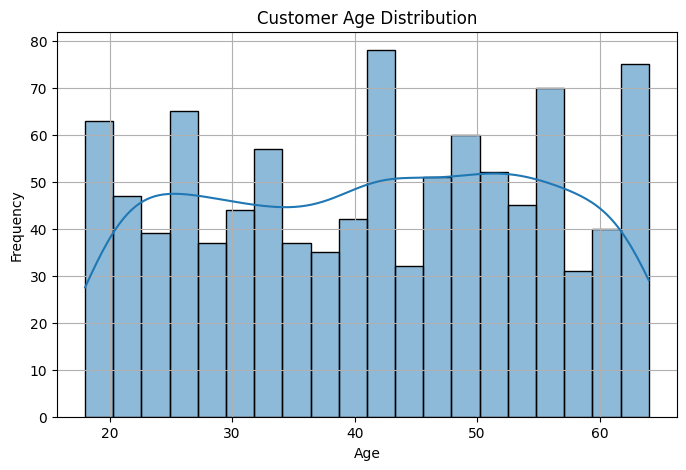

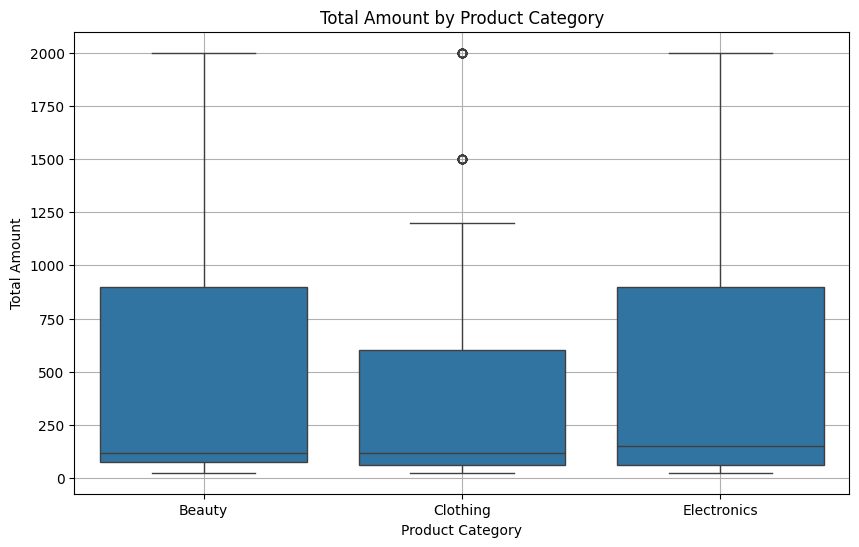

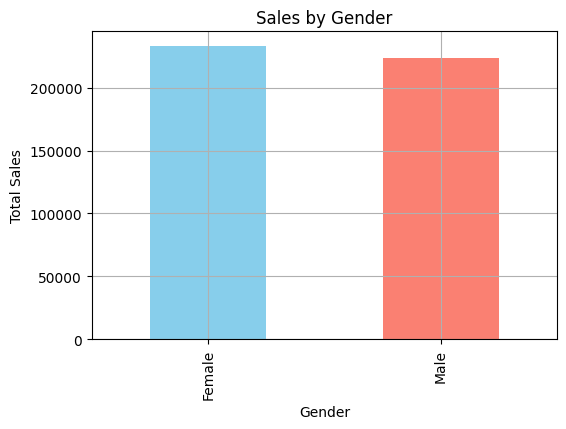

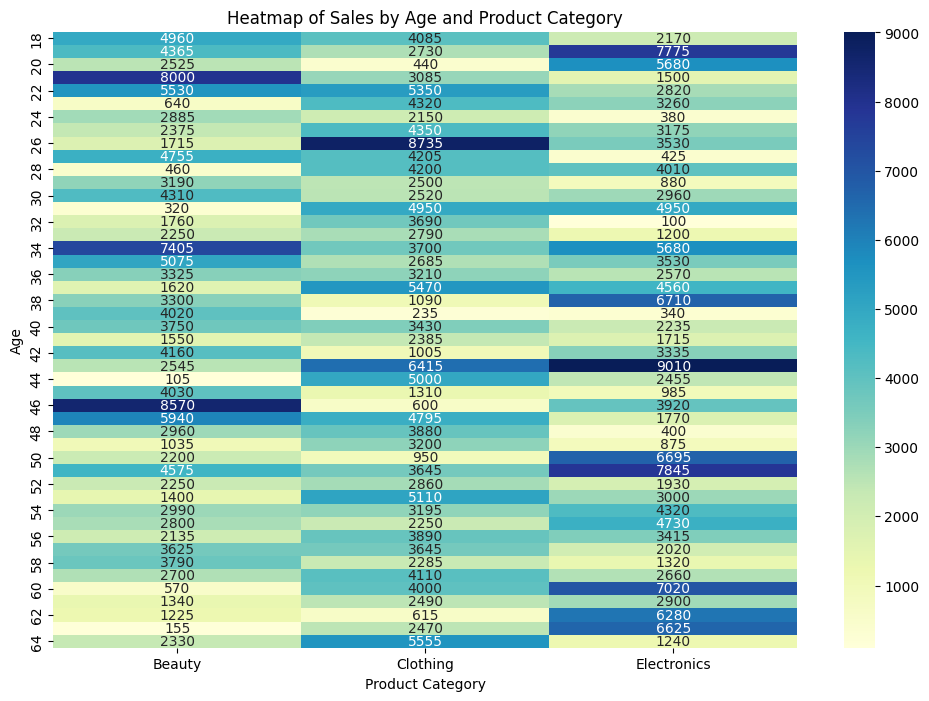


1. Focus marketing efforts on the age group with the highest purchasing power, especially in top-selling product categories.
2. Increase stock and promotional activities for the most popular product categories, particularly during high-sales months.
3. Consider personalized marketing campaigns for different genders based on their purchasing behavior.
4. Utilize time series analysis to forecast future sales trends and optimize inventory management.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('retail_sales_dataset.csv')

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Data Cleaning: Ensure there are no missing values and data types are correct
data.info()

# Descriptive Statistics
desc_stats = data.describe()
print(desc_stats)

# Calculate additional statistics: median and mode
median_age = data['Age'].median()
mode_category = data['Product Category'].mode()[0]
print(f"Median Age: {median_age}")
print(f"Mode Product Category: {mode_category}")

# Time Series Analysis: Analyze sales trends over time
data['Month'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Total Amount'].sum()

# Plot the sales trends over time
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Customer Analysis: Analyze customer demographics
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Product Analysis: Analyze purchasing behavior by product category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Category', y='Total Amount', data=data)
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

# Visualization: Bar chart for sales by gender
sales_by_gender = data.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(6, 4))
sales_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Heatmap of sales by age and product category
age_category_sales = data.pivot_table(index='Age', columns='Product Category', values='Total Amount', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(age_category_sales, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of Sales by Age and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.show()

# Recommendations
recommendations = """
1. Focus marketing efforts on the age group with the highest purchasing power, especially in top-selling product categories.
2. Increase stock and promotional activities for the most popular product categories, particularly during high-sales months.
3. Consider personalized marketing campaigns for different genders based on their purchasing behavior.
4. Utilize time series analysis to forecast future sales trends and optimize inventory management.
"""
print(recommendations)
